# Riddler Classic: Gematria Scores 
Posted by FiveThirtyEight on January 10, 2020

> From Leonard Cohen comes a puzzle at the intersection of language and mathematics:
>
>In Jewish study, “Gematria” is an alphanumeric code where words are assigned numerical values based on their letters. We can do the same in English, assigning 1 to the letter A, 2 to the letter B, and so on, up to 26 for the letter Z. The value of a word is then the sum of the values of its letters. For example, RIDDLER has an alphanumeric value of 70, since R + I + D + D + L + E + R becomes 18 + 9 + 4 + 4 + 12 + 5 + 18 = 70.
>
>But what about the values of different numbers themselves, spelled out as words? The number 1 (ONE) has an alphanumeric value of 15 + 14 + 5 = 34, and 2 (TWO) has an alphanumeric value of 20 + 23 + 15 = 58. Both of these values are bigger than the numbers themselves.
>
>Meanwhile, if we look at larger numbers, 1,417 (ONE THOUSAND FOUR HUNDRED SEVENTEEN) has an alphanumeric value of 379, while 3,140,275 (THREE MILLION ONE HUNDRED FORTY THOUSAND TWO HUNDRED SEVENTY FIVE) has an alphanumeric value of 718. These values are much smaller than the numbers themselves.
>
>If we consider all the whole numbers that are less than their alphanumeric value, what is the largest of these numbers?



In [285]:
spelling = {0: "", 1: "one", 2: "two", 3: "three", 4: "four", 5: "five", 6: "six",
            7: "seven", 8: "eight", 9: "nine", 10: "ten", 11: "eleven", 
            12: "twelve", 13: "thirteen", 14: "fourteen", 15: "fifteen",
            16: "sixteen", 17: "seventeen", 18: "eighteen", 19: "nineteen",
            20: "twenty", 30: "thirty", 40: "forty", 50: "fifty", 60: "sixty",
            70: "seventy", 80: "eighty", 90: "ninety"}

def spell_number(num):
    """
    Spells the number out recursively
    """
    try:
        return spelling[num]
    except KeyError:
        if num < 100:
            return f'{spell_number((num // 10) * 10)} {spell_number(num % 10)}'
        if num < 1e3:
            return f'{spell_number(num // 100)} hundred {spell_number(num % 100)}'
        if num < 1e6:
            return f'{spell_number(num // 1e3)} thousand {spell_number(num % 1e3)}'
        if num < 1e9:
            return f'{spell_number(num // 1e6)} million {spell_number(num % 1e6)}'
        if num < 1e12:
            return f'{spell_number(num // 1e9)} billion {spell_number(num % 1e9)}'
        if num > 1e12:
            return "Can't spell numbers this high"

for i in range(10):
    n =  np.random.randint(0, 1500000000)
    print(n, spell_number(n))


626454682 six hundred twenty six million four hundred fifty four thousand six hundred eighty two
164588740 one hundred sixty four million five hundred eighty eight thousand seven hundred forty
257281869 two hundred fifty seven million two hundred eighty one thousand eight hundred sixty nine
1498632337 one billion four hundred ninety eight million six hundred thirty two thousand three hundred thirty seven
187818399 one hundred eighty seven million eight hundred eighteen thousand three hundred ninety nine
446339672 four hundred forty six million three hundred thirty nine thousand six hundred seventy two
990745663 nine hundred ninety million seven hundred forty five thousand six hundred sixty three
1147496327 one billion one hundred forty seven million four hundred ninety six thousand three hundred twenty seven
848716105 eight hundred forty eight million seven hundred sixteen thousand one hundred five
584287480 five hundred eighty four million two hundred eighty seven thousand four hundre

In [185]:
letters = list(map(chr, range(97, 123)))
letter_map = {}
for i, l in enumerate(letters):
    letter_map[l] = i+1

letter_map[' '] = 0
print(letter_map['o'], letter_map['n'], letter_map['e'])

15 14 5


In [195]:
import numpy as np

def calculate_gematria_score(string):
    """
    Calculate the gematria score as defined in the puzzle above
    """
    sum = 0
    for letter in string:
        sum += letter_map[letter]
    return sum

print('One: ', calculate_gematria_score('one'))
print('Two: ', calculate_gematria_score('two'))
print('Hundred: ', calculate_gematria_score('hundred'))

One:  34
Two:  58
Hundred:  74


In [205]:
gematria_scores = [calculate_gematria_score(spell_number(num)) for num in range(int(1e5))]
gematria_scores[0] = calculate_gematria_score('zero')

In [207]:
low = [(num, score) for num, score in enumerate(gematria_scores) if num < score]
low[-1]

(279, 284)

The highest number where N < G(N) is 279. 

## Some visualizations

<module 'matplotlib.pyplot' from 'C:\\Users\\aksin\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

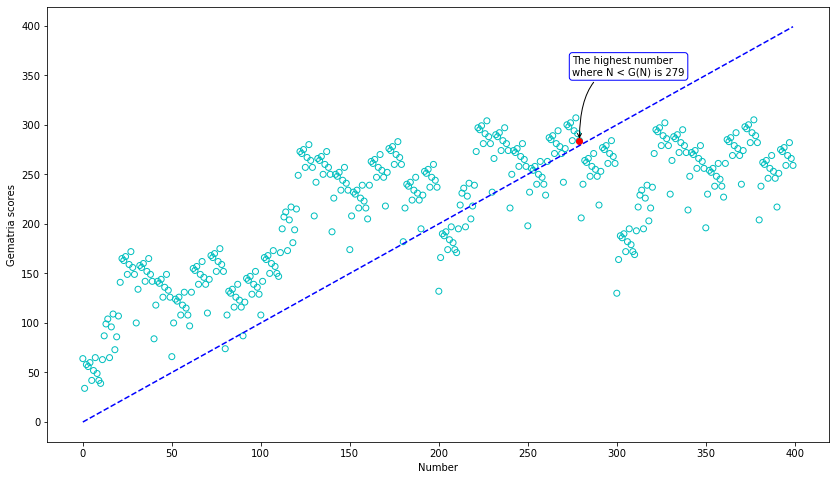

In [280]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(range(0, 400), gematria_scores[:400], facecolors='none', edgecolors='c')
plt.plot(279, gematria_scores[279], 'ro')
plt.annotate('The highest number\nwhere N < G(N) is 279', 
             bbox=dict(boxstyle="round", fc="none", ec="b"),
             xy=(279, gematria_scores[279]),  
             xytext=(275, 350),
             ha='left',
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="angle3,angleA=0,angleB=-90"))
plt.plot(range(0, 400), 'b--')
plt.xlabel('Number')
plt.ylabel('Gematria scores')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\aksin\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

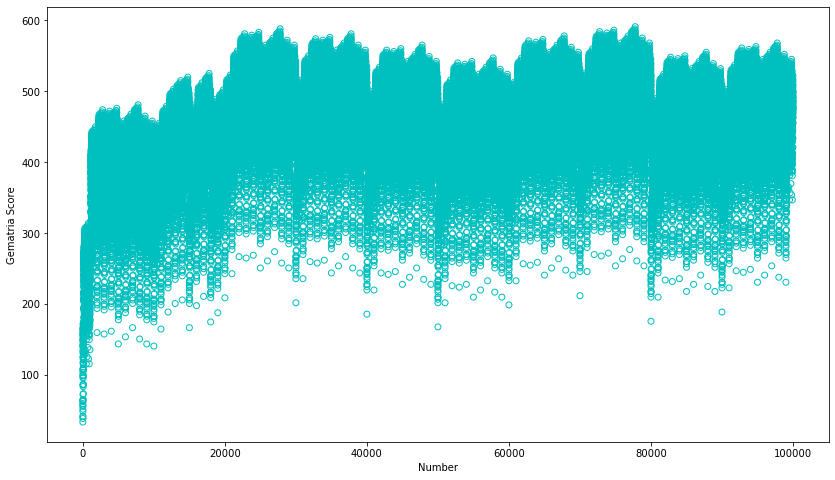

In [276]:
plt.figure(figsize=(14, 8))
plt.scatter(range(len(gematria_scores)), gematria_scores, facecolors='none', edgecolors='c')
plt.xlabel('Number')
plt.ylabel('Gematria Score')
plt

There is a certain periodocity to the Gematria scores, which is interesting. 